In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay, precision_score, f1_score, silhouette_score
from sklearn.mixture import GaussianMixture as GMM
from scipy.optimize import linear_sum_assignment as linear_assignment
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import io
import os
import json
import numpy as np
import pandas as pd
import networkx as nx
from typing import List
from six.moves import urllib
from scipy.sparse import coo_matrix
from collections import defaultdict
from itertools import islice
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from pylab import rcParams
from sklearn.cluster import Birch
import pprint
from IPython.display import Markdown, display
from tabulate import tabulate


In [6]:
def get_graph(data = "deezer_edges.json"):
    with open(data, 'r') as j:
        aDict = json.loads(j.read())
        return aDict

def get_target(data = "deezer_target.csv"):
    df = pd.read_csv(data)
    target = np.array(df["target"])
    return target

In [7]:
target = get_target()

In [8]:
graphs = get_graph()

G = []
# graphs
for graph in graphs.values():
    d = defaultdict(list)
    for x,y in graph:
        d[x].append(y)
        d[y].append(x)
    # print(len(d.keys()))
    G.append(nx.from_dict_of_lists(d))

In [ ]:
# generate features
edges = []
nodes = []
avg_degree = []
min_degree = []
max_degree = []
std_degree = []
median_degree = []
density = []
avg_clustering = []
min_clustering = []
max_clustering = []
std_clustering = []
median_clustering = []
num_triangles = [] 
transitivity = []
assortativity = []
avg_shortest_path_length = [] 
center = [] 
is_biconnected = []  
avg_eigenvalue_centrality = [] 
min_eigenvalue_centrality = [] 
max_eigenvalue_centrality = [] 
std_eigenvalue_centrality = [] 
median_eigenvalue_centrality = [] 
avg_pagerank = []
min_pagerank = []
max_pagerank = []
std_pagerank = []
median_pagerank = []
laplacian_matrix_eigenvalue_1 = []
laplacian_matrix_eigenvalue_2 = []
laplacian_matrix_eigenvalue_3 = []
laplacian_matrix_eigenvalue_4 = []
laplacian_matrix_eigenvalue_5 = []
SVD_laplacian_matrix_singularvalue_1 = []
SVD_laplacian_matrix_singularvalue_2 = []
SVD_laplacian_matrix_singularvalue_3 = []
SVD_laplacian_matrix_singularvalue_4 = []
SVD_laplacian_matrix_singularvalue_5 = []
adjacency_matrix_eigenvalue_1 = []
adjacency_matrix_eigenvalue_2 = []
adjacency_matrix_eigenvalue_3 = []
adjacency_matrix_eigenvalue_4 = []
adjacency_matrix_eigenvalue_5 = []

X = nx.laplacian_matrix(G[0]).toarray()
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd = svd.fit(X)


for g in G:
    nodes.append(g.number_of_nodes())
    edges.append(g.number_of_edges())
    avg_degree.append(np.average(list(dict(g.degree).values())))
    min_degree.append(np.min(list(dict(g.degree).values())))
    max_degree.append(np.max(list(dict(g.degree).values())))
    std_degree.append(np.std(list(dict(g.degree).values())))
    median_degree.append(np.median(list(dict(g.degree).values())))
    density.append(nx.density(g))
    avg_clustering.append(nx.average_clustering(g))
    min_clustering.append(np.min(list(dict(nx.clustering(g)).values())))
    max_clustering.append(np.max(list(dict(nx.clustering(g)).values())))
    std_clustering.append(np.std(list(dict(nx.clustering(g)).values())))
    median_clustering.append(np.median(list(dict(nx.clustering(g)).values())))
    num_triangles.append(sum(nx.triangles(g).values()) / 3)
    transitivity.append(nx.transitivity(g))
    assortativity.append(nx.degree_assortativity_coefficient(g))
    avg_shortest_path_length.append(nx.average_shortest_path_length(g))
    center.append(nx.center(g)[0])
    is_biconnected.append(1 if nx.is_biconnected(g)==True else 0)
    centrality = nx.eigenvector_centrality_numpy(g)
    avg_eigenvalue_centrality.append(np.average(list(centrality.values())))
    min_eigenvalue_centrality.append(np.min(list(centrality.values())))
    max_eigenvalue_centrality.append(np.max(list(centrality.values())))
    std_eigenvalue_centrality.append(np.std(list(centrality.values())))
    median_eigenvalue_centrality.append(np.median(list(centrality.values())))
    avg_pagerank.append(np.average(list(nx.pagerank(g).values())))
    min_pagerank.append(np.min(list(nx.pagerank(g).values())))
    max_pagerank.append(np.max(list(nx.pagerank(g).values())))
    std_pagerank.append(np.std(list(nx.pagerank(g).values())))
    median_pagerank.append(np.median(list(nx.pagerank(g).values())))
    X = nx.laplacian_matrix(g).toarray()
    eigenvalues, eigenvectors = np.linalg.eig(X)
    sorted_top_5_eigenvalues = np.sort(eigenvalues)[::-1][:5]
    laplacian_matrix_eigenvalue_1.append(sorted_top_5_eigenvalues[0])
    laplacian_matrix_eigenvalue_2.append(sorted_top_5_eigenvalues[1])
    laplacian_matrix_eigenvalue_3.append(sorted_top_5_eigenvalues[2])
    laplacian_matrix_eigenvalue_4.append(sorted_top_5_eigenvalues[3])
    laplacian_matrix_eigenvalue_5.append(sorted_top_5_eigenvalues[4]) 
    svd_ = svd.fit(X)
    sorted_top_5_singularvalue = np.sort(svd_.singular_values_)[::-1][:5]
    SVD_laplacian_matrix_singularvalue_1.append(sorted_top_5_singularvalue[0])
    SVD_laplacian_matrix_singularvalue_2.append(sorted_top_5_singularvalue[1])
    SVD_laplacian_matrix_singularvalue_3.append(sorted_top_5_singularvalue[2])
    SVD_laplacian_matrix_singularvalue_4.append(sorted_top_5_singularvalue[3])
    SVD_laplacian_matrix_singularvalue_5.append(sorted_top_5_singularvalue[4])
    A = nx.adjacency_matrix(g).toarray()
    eigenvalues_adjacency, eigenvectors_adjacency = np.linalg.eig(A)
    sorted_top_5_eigenvalues_adjacency = np.sort(eigenvalues_adjacency)[::-1][:5]
    adjacency_matrix_eigenvalue_1.append(sorted_top_5_eigenvalues_adjacency[0])
    adjacency_matrix_eigenvalue_2.append(sorted_top_5_eigenvalues_adjacency[1])
    adjacency_matrix_eigenvalue_3.append(sorted_top_5_eigenvalues_adjacency[2])
    adjacency_matrix_eigenvalue_4.append(sorted_top_5_eigenvalues_adjacency[3])
    adjacency_matrix_eigenvalue_5.append(sorted_top_5_eigenvalues_adjacency[4]) 
    

    

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/var/folders/qd/438shd_x19l09p0179z9d1p40000gp/T/ipykernel_91609/2579964105.py:98: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g).toarray()
<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/var/folders/qd/438shd_x19l09p0179z9d1p40000gp/T/ipykernel_91609/2579964105.py:98: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g).toarray()
<class 'networkx.utils.decorators.argmap'> compilation 8:4: Future

In [10]:
features = [edges,
            nodes,
            avg_degree,
            min_degree,
            max_degree,
            std_degree,
            median_degree,
            density,
            avg_clustering,
            min_clustering,
            max_clustering,
            std_clustering,
            median_clustering,
            num_triangles,
            transitivity,
            assortativity,
            avg_shortest_path_length,
            center,
            is_biconnected,
            avg_eigenvalue_centrality,
            min_eigenvalue_centrality,
            max_eigenvalue_centrality,
            std_eigenvalue_centrality,
            median_eigenvalue_centrality,
            avg_pagerank,
            min_pagerank,
            max_pagerank,
            std_pagerank,
            median_pagerank,
            laplacian_matrix_eigenvalue_1,
            laplacian_matrix_eigenvalue_2,
            laplacian_matrix_eigenvalue_3,
            laplacian_matrix_eigenvalue_4,
            laplacian_matrix_eigenvalue_5,
            SVD_laplacian_matrix_singularvalue_1,
            SVD_laplacian_matrix_singularvalue_2,
            SVD_laplacian_matrix_singularvalue_3,
            SVD_laplacian_matrix_singularvalue_4,
            SVD_laplacian_matrix_singularvalue_5,
            adjacency_matrix_eigenvalue_1,
            adjacency_matrix_eigenvalue_2,
            adjacency_matrix_eigenvalue_3,
            adjacency_matrix_eigenvalue_4,
            adjacency_matrix_eigenvalue_5
]

for i, column in enumerate(features):
    features[i] =  np.array(column).astype(float)
    

column_names = ['edges',
            'nodes',
            'avg_degree',
            'min_degree',
            'max_degree',
            'std_degree',
            'median_degree',
            'density',
            'avg_clustering',
            'min_clustering',
            'max_clustering',
            'std_clustering',
            'median_clustering',
            'num_triangles',
            'transitivity',
            'assortativity',
            'avg_shortest_path_length',
            'center',
            'is_biconnected',
            'avg_eigenvalue_centrality',
            'min_eigenvalue_centrality',
            'max_eigenvalue_centrality',
            'std_eigenvalue_centrality',
            'median_eigenvalue_centrality',
            'avg_pagerank',
            'min_pagerank',
            'max_pagerank',
            'std_pagerank',
            'median_pagerank',
            'laplacian_matrix_eigenvalue_1',
            'laplacian_matrix_eigenvalue_2',
            'laplacian_matrix_eigenvalue_3',
            'laplacian_matrix_eigenvalue_4',
            'laplacian_matrix_eigenvalue_5',
            'SVD_laplacian_matrix_singularvalue_1',
            'SVD_laplacian_matrix_singularvalue_2',
            'SVD_laplacian_matrix_singularvalue_3',
            'SVD_laplacian_matrix_singularvalue_4',
            'SVD_laplacian_matrix_singularvalue_5',
            'adjacency_matrix_eigenvalue_1',
            'adjacency_matrix_eigenvalue_2',
            'adjacency_matrix_eigenvalue_3',
            'adjacency_matrix_eigenvalue_4',
            'adjacency_matrix_eigenvalue_5'
]

df = pd.DataFrame(features, index=column_names).transpose()
df.insert(loc=0, column='gender', value=target)

/var/folders/qd/438shd_x19l09p0179z9d1p40000gp/T/ipykernel_91609/4292108623.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  features[i] =  np.array(column).astype(float)


In [11]:
# features + target column
df

gender   edges  nodes  avg_degree  min_degree  max_degree  std_degree  \
0          0  1669.0  287.0   11.630662         1.0       286.0   21.220499   
1          1    39.0   18.0    4.333333         1.0        17.0    3.829708   
2          0   199.0   43.0    9.255814         1.0        42.0    8.532000   
3          0    83.0   19.0    8.736842         1.0        18.0    4.733332   
4          1    17.0   15.0    2.266667         1.0        14.0    3.234536   
...      ...     ...    ...         ...         ...         ...         ...   
9624       1    34.0   25.0    2.720000         1.0        24.0    4.467841   
9625       1    33.0   20.0    3.300000         1.0        19.0    3.887158   
9626       1    16.0   12.0    2.666667         1.0        11.0    2.560382   
9627       1    12.0   11.0    2.181818         1.0        10.0    2.516064   
9628       1    40.0   22.0    3.636364         1.0        21.0    4.151073   

      median_degree   density  avg_clustering  ...  \
0               6.0  0.040667        0.549899  ...   
1               3.0  0.254902        0.563484  ...   
2               9.0  0.220377        0.729279  ...   
3               9.0  0.485380        0.674459  ...   
4               1.0  0.161905        0.235531  ...   
...             ...       ...             ...  ...   
9624            1.0  0.113333        0.408116  ...   
9625            2.0  0.173684        0.677427  ...   
9626            2.0  0.242424        0.729798  ...   
9627            1.0  0.218182        0.367677  ...   
9628            2.5  0.173160        0.484416  ...   

      SVD_laplacian_matrix_singularvalue_1  \
0                                    287.0   
1                                     18.0   
2                                     43.0   
3                                     19.0   
4                                     15.0   
...                                    ...   
9624                                  25.0   
9625                                  20.0   
9626                                  12.0   
9627                                  11.0   
9628                                  22.0   

      SVD_laplacian_matrix_singularvalue_2  \
0                               138.020261   
1                                 8.328572   
2                                34.016665   
3                                16.000000   
4                                 5.000000   
...                                    ...   
9624                              6.000000   
9625                              7.000000   
9626                              4.000000   
9627                              3.000000   
9628                              8.104788   

      SVD_laplacian_matrix_singularvalue_3  \
0                                73.139505   
1                                 8.000000   
2                                23.217533   
3                                14.945636   
4                                 2.000000   
...                                    ...   
9624                              4.000000   
9625                              6.000000   
9626                              3.000000   
9627                              3.000000   
9628                              6.782840   

      SVD_laplacian_matrix_singularvalue_4  \
0                                69.158685   
1                                 8.000000   
2                                22.937799   
3                                14.092352   
4                                 2.000000   
...                                    ...   
9624                              4.000000   
9625                              6.000000   
9626                              3.000000   
9627                              1.000000   
9628                              5.919409   

      SVD_laplacian_matrix_singularvalue_5  adjacency_matrix_eigenvalue_1  \
0                                59.109493                      30.462273   
1                                 7.364047

In [64]:
# Computing external variables using a correlation matrix 

corr_matrix = df.corr()
external_variables_keys = corr_matrix['gender'].abs().sort_values().nlargest(n=4).keys().tolist()[1:]
external_variables_values = corr_matrix['gender'].abs().sort_values().nlargest(n=4).tolist()[1:]
print('External variables keys:\n', external_variables_keys)
print('External variables values:\n', external_variables_values)

External variables keys:
 ['std_eigenvalue_centrality', 'adjacency_matrix_eigenvalue_4', 'adjacency_matrix_eigenvalue_5']
External variables values:
 [0.0653814854036368, 0.06156039422789969, 0.05951721462885195]


In [68]:
# Table for PDF - find top 3 external features 

index_names = ["Deezer Ego Nets"]

table = []
temp = []
for i in range(len(external_variables_values)):
    temp.append(f'({external_variables_keys[i]}, { external_variables_values[i]})')
table.append(temp)

print(tabulate(table, headers=["Feature 1st", "Feature 2nd", "Feature 3rd"], showindex=index_names, tablefmt="latex"))

\begin{tabular}{llll}
\hline
                 & Feature 1st                                     & Feature 2nd                                          & Feature 3rd                                          \\
\hline
 Deezer Ego Nets & (std\_eigenvalue\_centrality, 0.0653814854036368) & (adjacency\_matrix\_eigenvalue\_4, 0.06156039422789969) & (adjacency\_matrix\_eigenvalue\_5, 0.05951721462885195) \\
\hline
\end{tabular}


In [17]:
df.describe()

gender        edges        nodes   avg_degree   min_degree  \
count  9629.000000  9629.000000  9629.000000  9629.000000  9629.000000   
mean      0.431924    65.251116    23.492886     4.292454     1.073839   
std       0.495370   129.733115    19.789463     2.716044     0.441004   
min       0.000000    10.000000    11.000000     1.818182     1.000000   
25%       0.000000    19.000000    13.000000     2.666667     1.000000   
50%       0.000000    31.000000    17.000000     3.454545     1.000000   
75%       1.000000    57.000000    26.000000     4.909091     1.000000   
max       1.000000  2326.000000   363.000000    34.821053    11.000000   

        max_degree   std_degree  median_degree      density  avg_clustering  \
count  9629.000000  9629.000000    9629.000000  9629.000000     9629.000000   
mean     22.492886     4.227584       3.288036     0.226408        0.510017   
std      19.789463     2.124557       2.748123     0.109672        0.165288   
min      10.000000     0.792527       1.000000     0.014695        0.000000   
25%      12.000000     2.896642       2.000000     0.153846        0.421679   
50%      16.000000     3.568412       2.500000     0.204762        0.532734   
75%      25.000000     4.742187       4.000000     0.272727        0.622222   
max     362.000000    22.637523      33.000000     0.909091        0.909259   

       ...  SVD_laplacian_matrix_singularvalue_1  \
count  ...                           9629.000000   
mean   ...                             23.492886   
std    ...                             19.789463   
min    ...                             11.000000   
25%    ...                             13.000000   
50%    ...                             17.000000   
75%    ...                             26.000000   
max    ...                            363.000000   

       SVD_laplacian_matrix_singularvalue_2  \
count                           9629.000000   
mean                               9.548003   
std                                8.059119   
min                                1.000000   
25%                                5.000000   
50%                                7.253644   
75%                               11.107371   
max                              138.020261   

       SVD_laplacian_matrix_singularvalue_3  \
count                           9629.000000   
mean                               8.098837   
std                                7.119471   
min                                1.000000   
25%                                4.000000   
50%                                6.096648   
75%                                9.541448   
max                               84.772200   

       SVD_laplacian_matrix_singularvalue_4  \
count                           9629.000000   
mean                               7.158498   
std                                6.869391   
min                                1.000000   
25%                                3.000000   
50%                                5.158825   
75%                                8.753637   
max                               80.017702   

       SVD_laplacian_matrix_singularvalue_5  adjacency_matrix_eigenvalue_1  \
count                           9629.000000                    9629.000000   
mean                               6.372545                       6.730875   
std                                6.687472                       3.937978   
min                                1.000000                       3.162278   
25%                                2.412380                       4.383109   
50%                                4.414214                       5.541650   
75%                                7.935272                       7.557126   
max                               73.036582                      43.190784   

       adjacency_matrix_eigenvalue_2  adjacency_matrix_eigenvalue_3  \
count                    9629.000000                    9629.000000   
mean                        2.375144           

In [65]:
def plot(predicted, X, ground_truth, label=True, ax=None):
    
    pca = PCA(2)
    X = pca.fit_transform(X)


    data = pd.DataFrame(data = X, columns = ['x','y'])    
    data['true'] = ground_truth
    data['pred'] = predicted

    # define a custom color palette with 2 different colors
    my_palette = ['b', '#FFA500']

    with sns.axes_style("darkgrid"):

        # Create a scatterplot with large points for the ground truth labels
        sns.scatterplot(x="x", y="y", hue="true", data=data, s=250, palette=my_palette[0:len(set(data['true']))], alpha=0.5)

        # Overlay a scatterplot with smaller points for the predicted labels
        sns.scatterplot(x="x", y="y", hue="pred", data=data, s=10, palette=my_palette[0:len(set(data['pred']))], alpha=1)


    # Add a legend with modified labels
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [f'{i}' for i in range(max(len(set(data['true'])), len(set(data['pred']))))]
    plt.legend(handles, labels)

    rcParams['figure.figsize'] = 25, 10

    # Show the plot
    plt.savefig('plot.png', bbox_inches='tight',pad_inches = 0)
    plt.show()

def printmd(string):
    display(Markdown(string))


def resultsPerModel(data, model, Visualization = False, anomaly = False, external_variables_keys_ = None):
    y = data['gender']
    data = data.iloc[:, 1:]
    scaler = MinMaxScaler()
    scaler = scaler.fit(data)
    data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
    data.insert(loc=0, column='gender', value=y)
    X = data.iloc[:, 1:]
    

    if anomaly:
        temp = data.copy()
        for i in data.columns.tolist()[1:]:
            mean = data[i].mean()
            std = data[i].std()
            # calculate upper threshold
            threshold_1 = mean + 3*std
            threshold_2 = mean - 3*std
            # select rows where feature is less than or equal to threshold
            data = data[(data[i] >= threshold_2) & (data[i] <= threshold_1)]

        df_only_anomaly = pd.merge(temp,data, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
        external_variables_keys_.append('gender')
        df_only_anomaly = df_only_anomaly[external_variables_keys_]
        corr_matrix = df_only_anomaly.corr()
        external_variables_values_ = corr_matrix['gender'].abs().sort_values().nlargest(n=4).tolist()[1:]
        
        y = data['gender']
        X = data.iloc[:, 1:]

    if hasattr(model, "fit_predict"):
        pred = model.fit_predict(X)
    else:
        pred = model.fit(X).predict(X)

    # True lables
    print("True lables:")
    print(y.value_counts().sort_index().to_dict(),'\n')

    # Prediction
    pred_labels = {}
    for item in pred:
        pred_labels[item] = pred_labels.get(item, 0) + 1

    print("Prediction labels:")
    pprint.pprint(pred_labels, sort_dicts=True)
    print('\nConfusion matrix:')
    cm = confusion_matrix(y,pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(max(len(np.unique(y)), len(set(pred))))])
    disp.plot()
    plt.savefig('confusion_matrix.png',  bbox_inches='tight',pad_inches = 0)
    plt.show()

    # Metrics
    print('Metrics scores:')
    accuracy = accuracy_score(y,pred)
    precision = precision_score(y, pred, average='macro')
    silhouette = silhouette_score(X, pred)
    silhouette_norm = (silhouette+1) / 2
    F1_score = f1_score(y , pred, average='macro')
    print("Accuracy:", accuracy)
    print("Precision:",precision_score(y, pred, average='macro'))
    print("Silhouette_score:", silhouette_norm)
    print("F1 score:", f1_score(y , pred, average='macro'))
    metrics_average = np.average([accuracy,precision,silhouette_norm,F1_score])
    print("Metrics average:", metrics_average)
    
    

    if Visualization:
        print('\nVisualization:')
        plot(pred, X, y)

    if anomaly:   
        return accuracy, precision, silhouette, F1_score, metrics_average, external_variables_values_
    else:
        return accuracy, precision, silhouette, F1_score, metrics_average

**kmeans**

True lables:
{0: 5470, 1: 4159} 

Prediction labels:
{0: 4836, 1: 4793}

Confusion matrix:


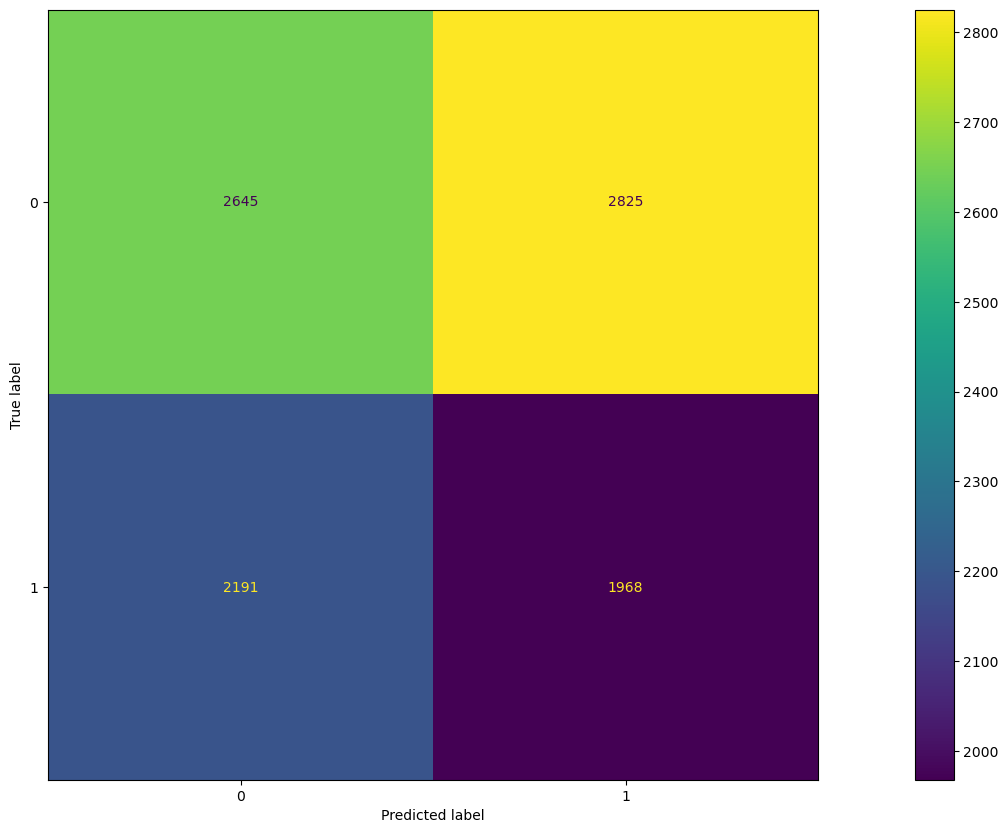

Metrics scores:
Accuracy: 0.47907363173745976
Precision: 0.4787692047111025
Silhouette_score: 0.6526921166668976
F1 score: 0.476485755714285
Metrics average: 0.5217551772074362

Visualization:


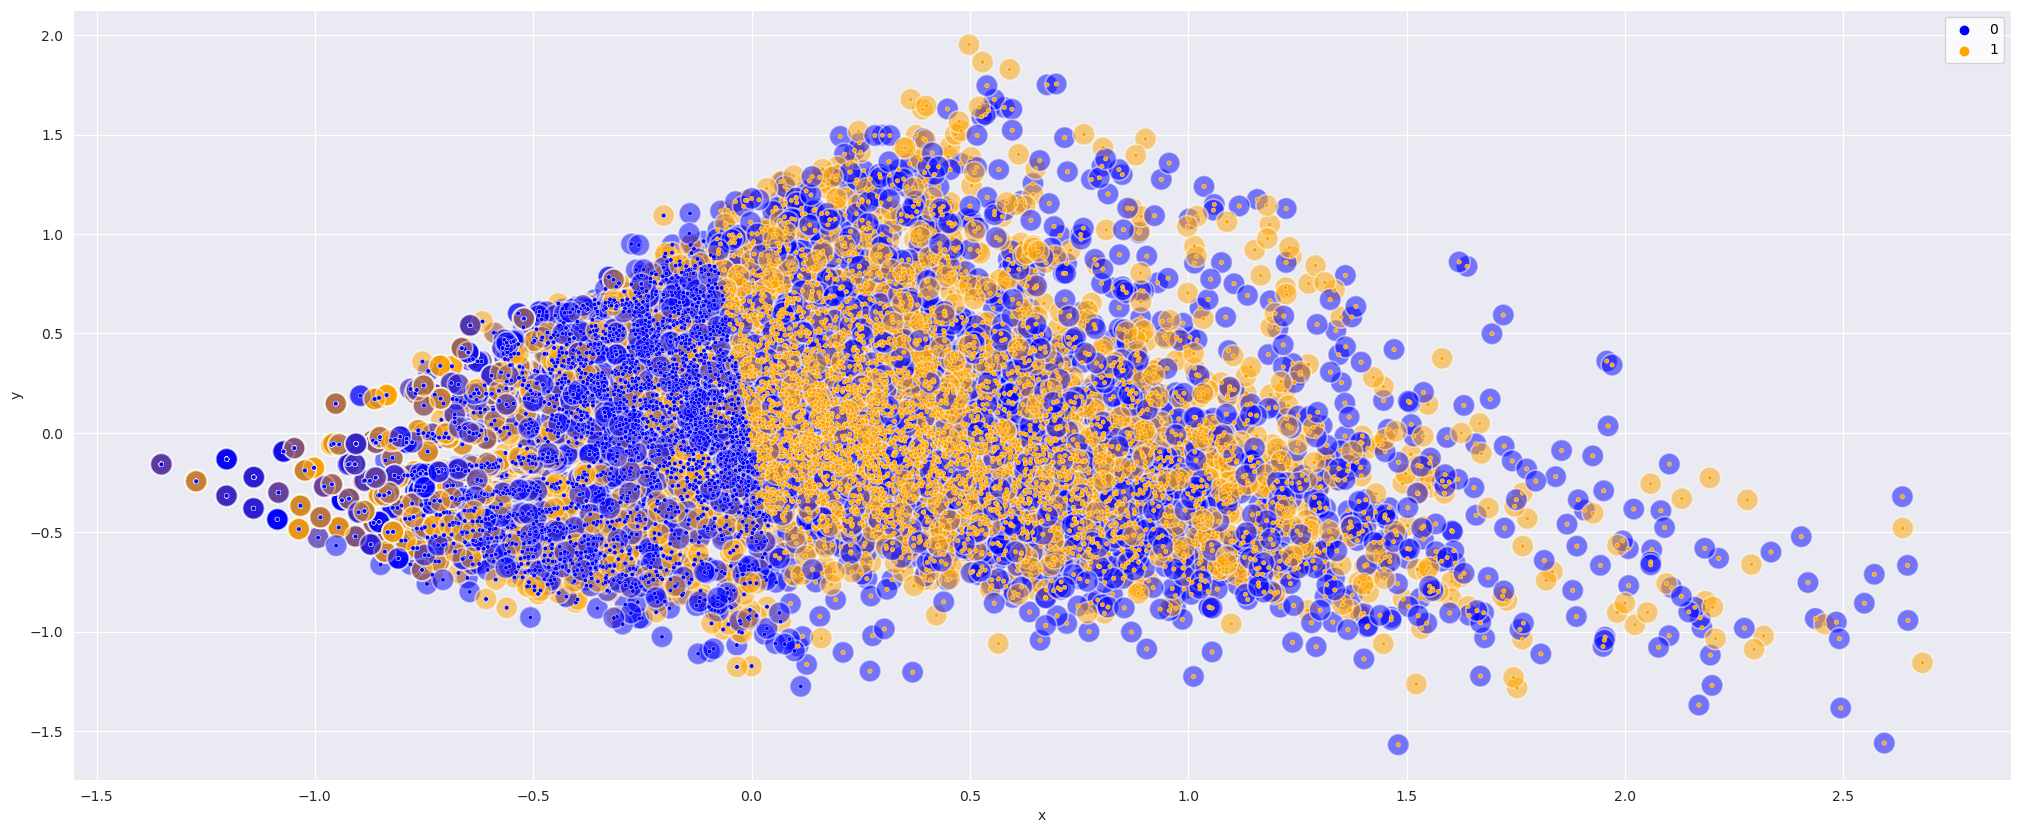

In [58]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=100)
printmd(f'**kmeans**')
accuracy_kmeans, precision_kmeans, silhouette_kmeans, f1_score_kmeans, kmeans_average = resultsPerModel(df, kmeans, Visualization = True)

**GMM**

True lables:
{0: 5470, 1: 4159} 

Prediction labels:
{0: 7784, 1: 1845}

Confusion matrix:


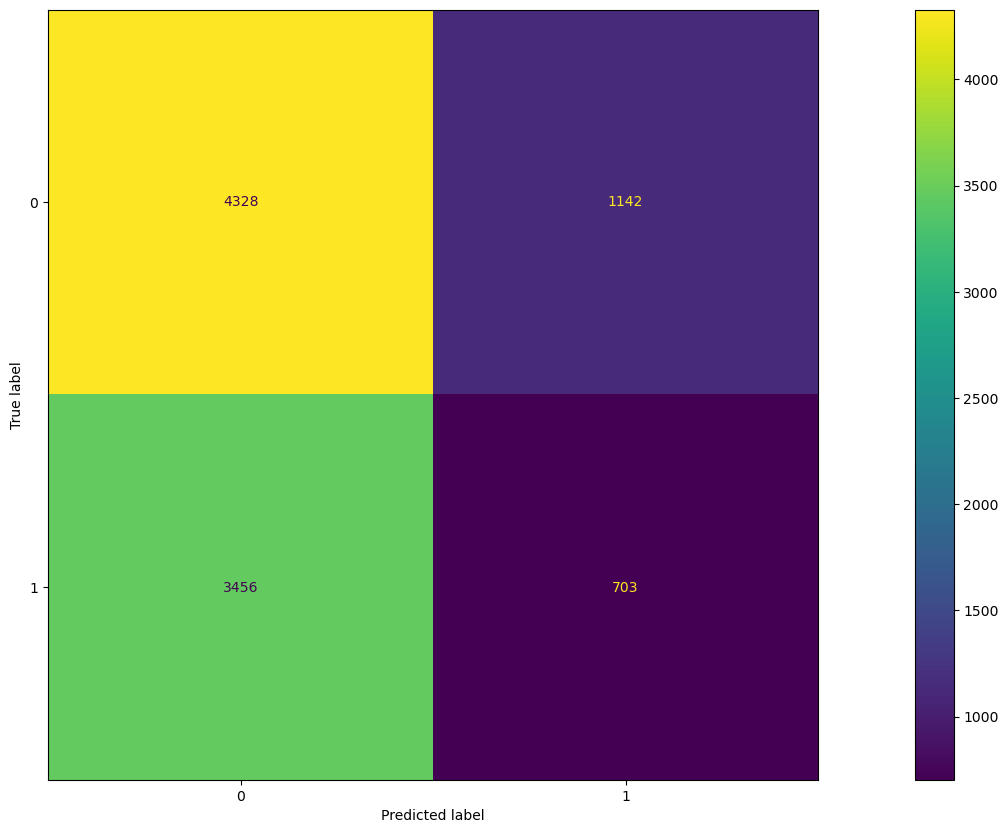

Metrics scores:
Accuracy: 0.5224841624260048
Precision: 0.4685210716444266
Silhouette_score: 0.6753930485366298
F1 score: 0.4436315380310315
Metrics average: 0.5275074551595232

Visualization:


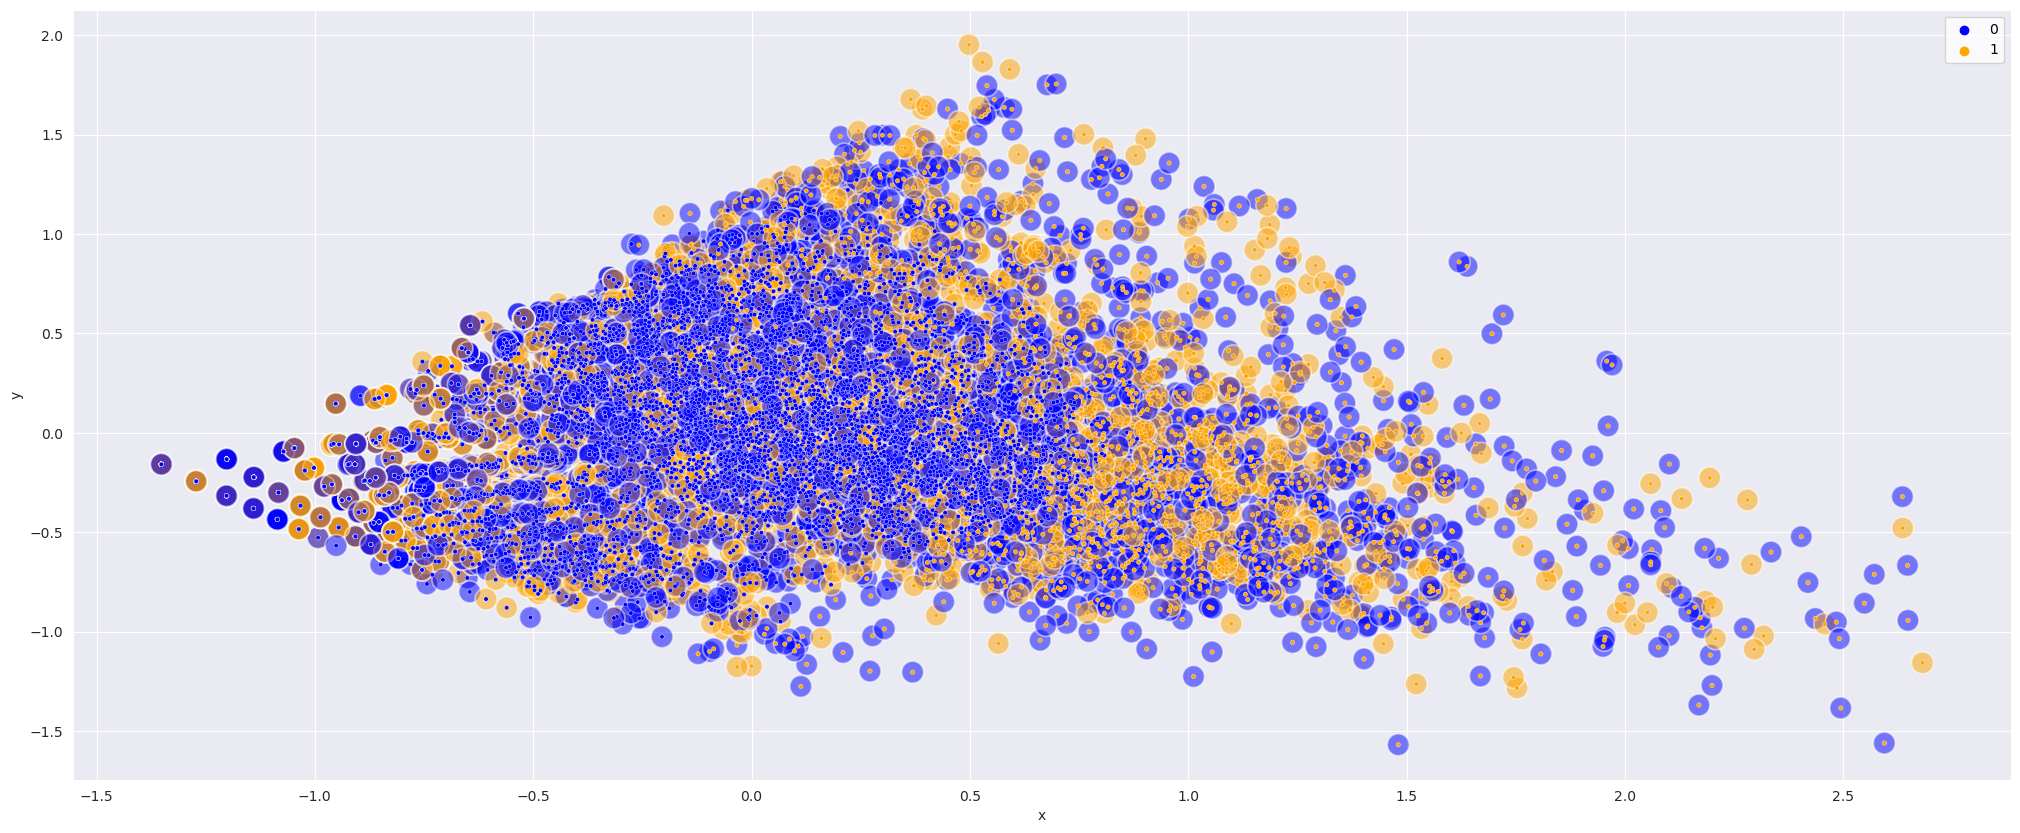

In [54]:
gmm = GMM(n_components=2, covariance_type='full', random_state=42)
printmd(f'**GMM**')
accuracy_gmm, precision_gmm, silhouette_gmm, f1_score_gmm, gmm_average = resultsPerModel(df, gmm, Visualization = True)

In [35]:
# Table for PDF - find best clusterign algorithm by average metrics

table = [[accuracy_kmeans, accuracy_gmm],
         [precision_kmeans, precision_gmm],
         [silhouette_kmeans, silhouette_gmm],
         [f1_score_kmeans, f1_score_gmm],
         [kmeans_average, gmm_average]]
         
        
index_names = ["Average Accuracy", "Average Precision", "Average Silhouette", "Average F1", "Average Metrics"]

print(tabulate(table, headers=["Kmeans", "GMM"], showindex=index_names, tablefmt="latex"))

\begin{tabular}{lrr}
\hline
                    &   Kmeans &      GMM \\
\hline
 Average Accuracy   & 0.479074 & 0.522484 \\
 Average Precision  & 0.478769 & 0.468521 \\
 Average Silhouette & 0.305384 & 0.350786 \\
 Average F1         & 0.476486 & 0.443632 \\
 Average Metrics    & 0.521755 & 0.527507 \\
\hline
\end{tabular}


**GMM anomaly detaction**

True lables:
{0: 3909, 1: 3124} 

Prediction labels:
{0: 3729, 1: 3304}

Confusion matrix:


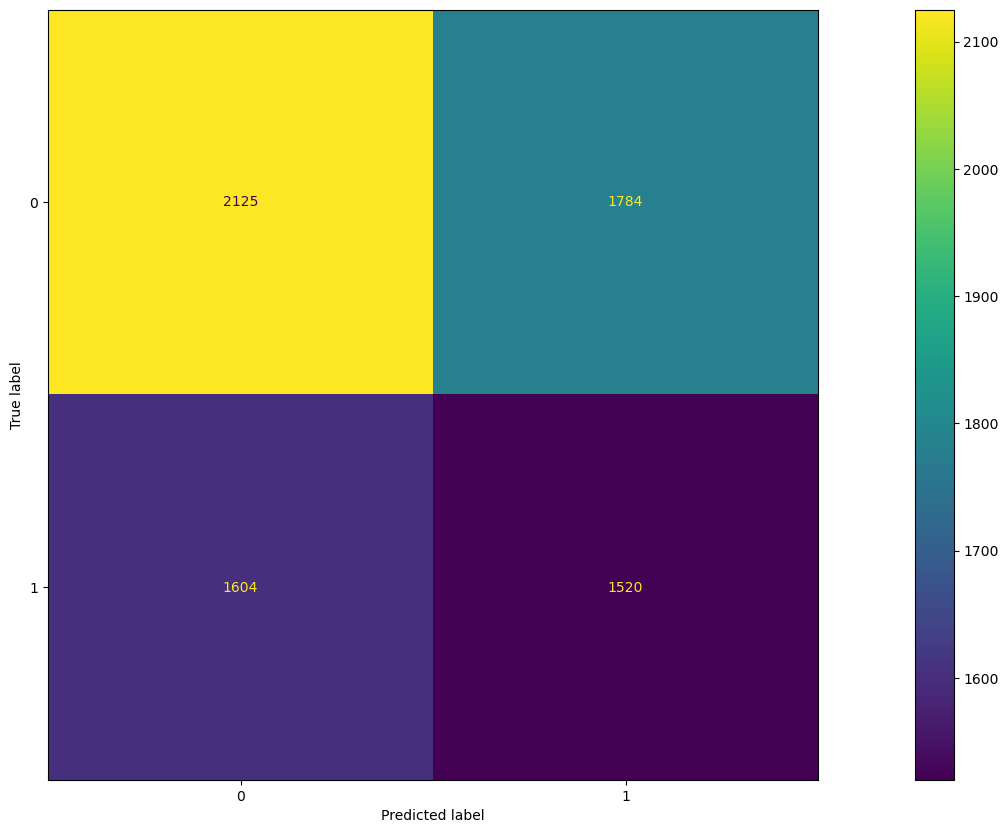

Metrics scores:
Accuracy: 0.5182710081046495
Precision: 0.5149531484464738
Silhouette_score: 0.655061145961605
F1 score: 0.5146796557936744
Metrics average: 0.5507412395766007

Visualization:


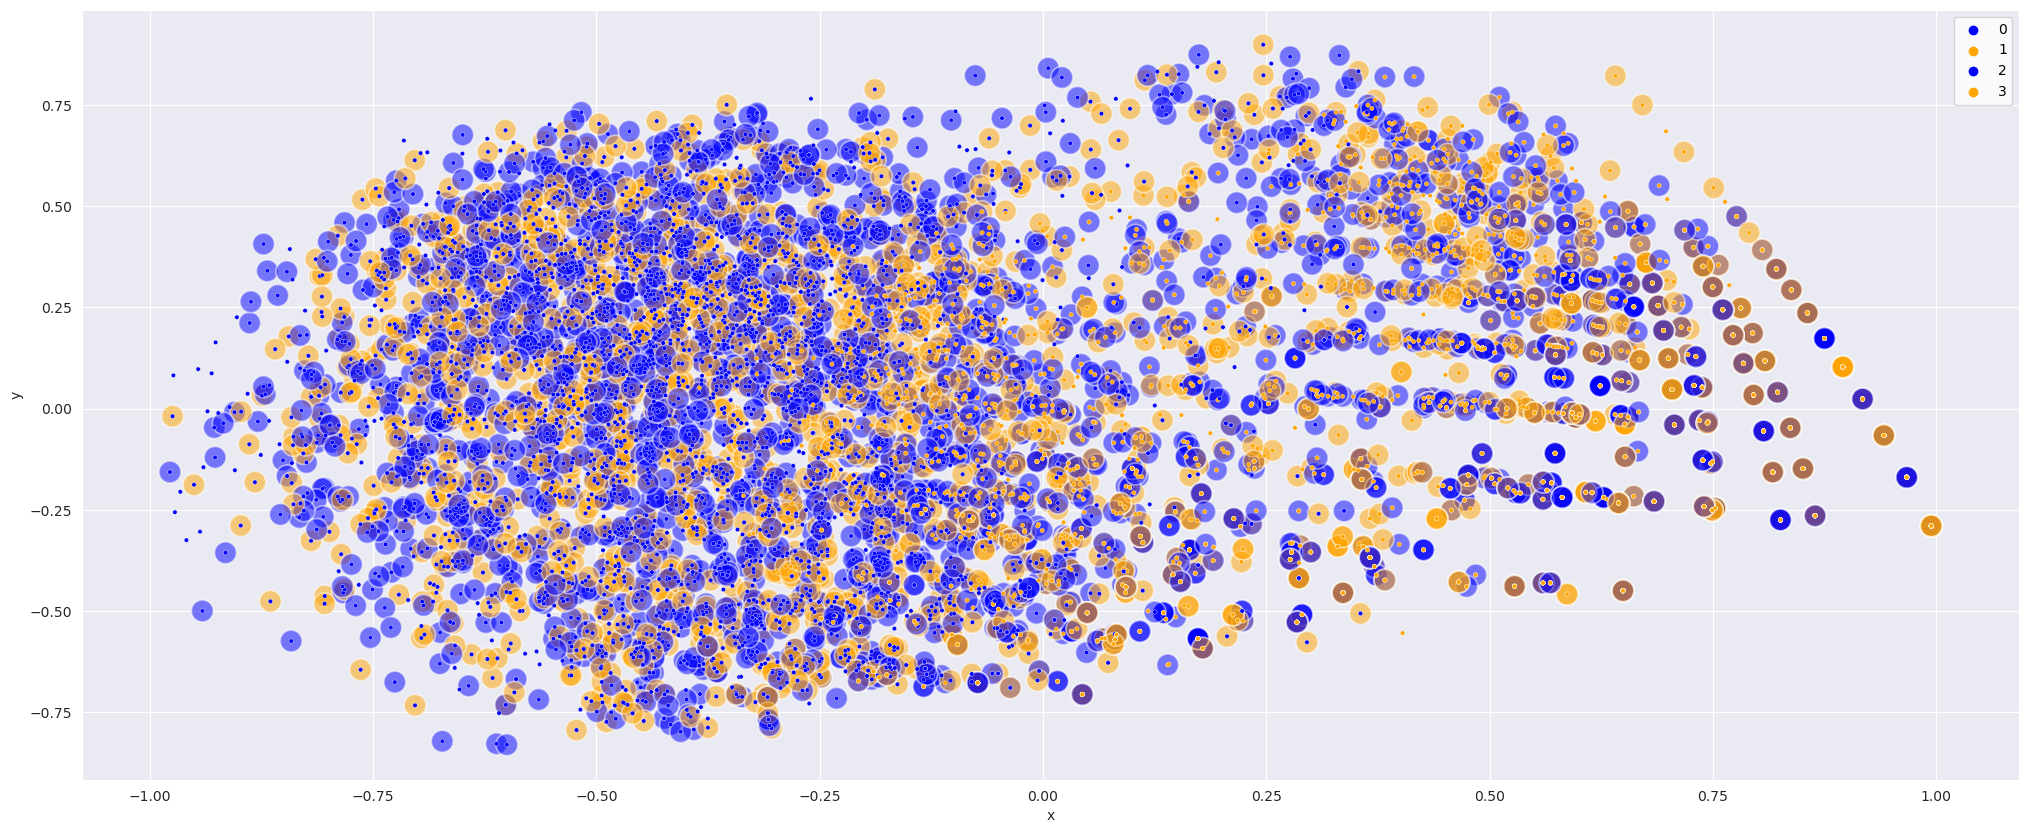

In [66]:
gmm = GMM(n_components=2, covariance_type='full', random_state=42)
printmd(f'**GMM anomaly detaction**')
accuracy_gmm_after_anomaly, precision_gmm_after_anomaly, silhouette_gmm_after_anomaly, f1_score_gmm_after_anomaly, gmm_average_after_anomaly, external_variables_values_after_anomaly = resultsPerModel(df, gmm, True, True, external_variables_keys)

In [48]:
# Table for PDF - external features after anomaly

index_names = ["Deezer Ego Nets"]

table = []
temp = []
for i in range(len(external_variables_values_after_anomaly)):
    temp.append(f'({external_variables_keys[i]}, { external_variables_values_after_anomaly[i]})')
table.append(temp)

print(tabulate(table, headers=["Feature 1st", "Feature 2nd", "Feature 3rd"], showindex=index_names, tablefmt="latex"))

\begin{tabular}{llll}
\hline
                 & Feature 1st                                      & Feature 2nd                                        & Feature 3rd                                          \\
\hline
 Deezer Ego Nets & (std\_eigenvalue\_centrality, 0.08935186445347533) & (adjacency\_matrix\_eigenvalue\_4, 0.071380965451809) & (adjacency\_matrix\_eigenvalue\_5, 0.06850493100181212) \\
\hline
\end{tabular}
